In [1]:
import calendar
import pandas as pd
import matplotlib.pyplot as plt
from helpers import sql

In [2]:
requests = sql("""
    SELECT * FROM csas2_csasrequest;
""", database='dmapps_250723', disambiguate=False)

In [3]:
def show_monthly_hist(df, year=None, ymax=400):
    months = [calendar.month_name[m + 1] for m in range(12)]
    
    if year:
        counts = df[df.created_at.dt.year == year].created_at.dt.month.value_counts().sort_index()
        title = f'Number of requests per month ({year})'
    else:
        counts = df.created_at.dt.month.value_counts().sort_index()
        title = 'Number of requests per month'
        
    counts.index = [calendar.month_name[m] for m in counts.index]
    counts = counts.reindex(months, fill_value=0)
    
    colors = ['C0'] * 12
    if not year or year == 2023:
        colors[4] = 'darkgrey'  # May 2023, there was a large import, these aren't real values
    
    fig = counts.plot(kind="bar", figsize=(8, 4), color=colors)
    
    if not year or year == 2023:
        fig.patches[4].set_hatch('x//')
        
    fig.set_title(title)
    fig.set_ylim(top=ymax)
    
    plt.show()


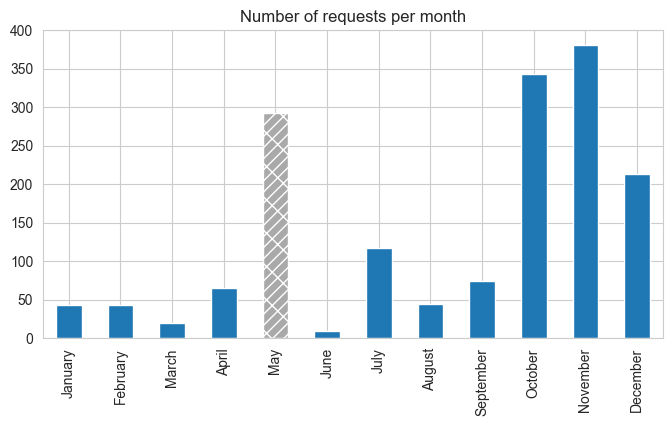

In [4]:
show_monthly_hist(requests)

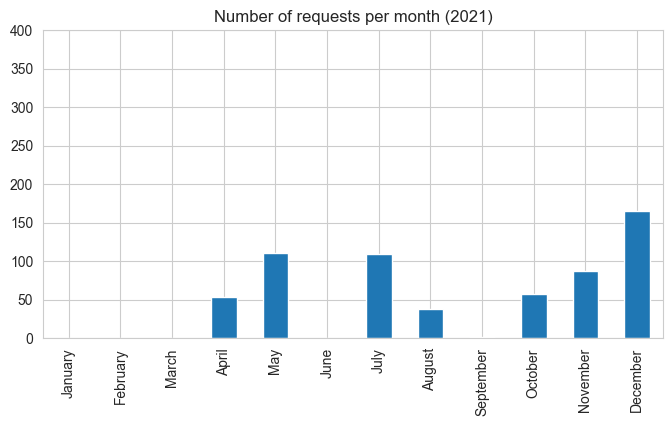

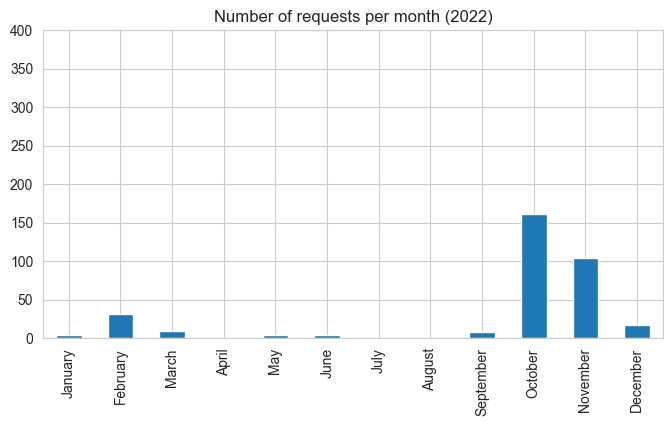

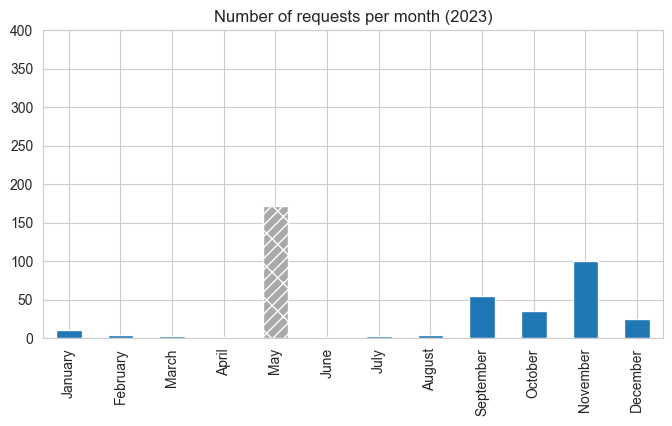

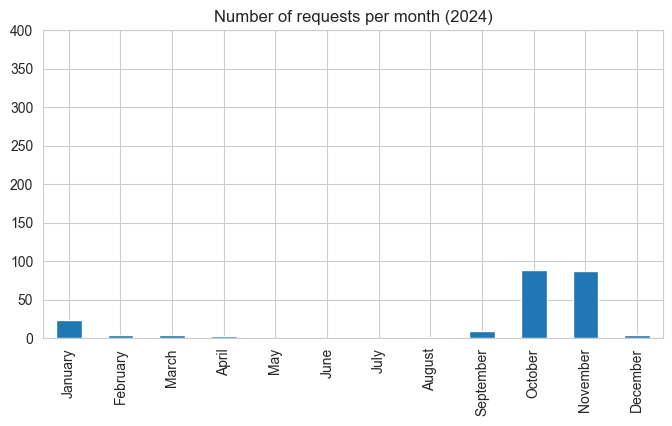

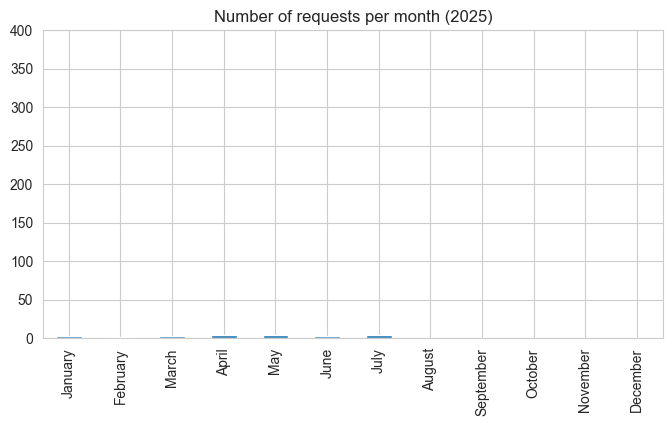

In [5]:
for year in requests.created_at.dt.year.unique():
    show_monthly_hist(requests, year)


full year totals since last large import



,count
January,27
February,6
March,7
April,8
May,5
June,3
July,6
August,7
September,64
October,124


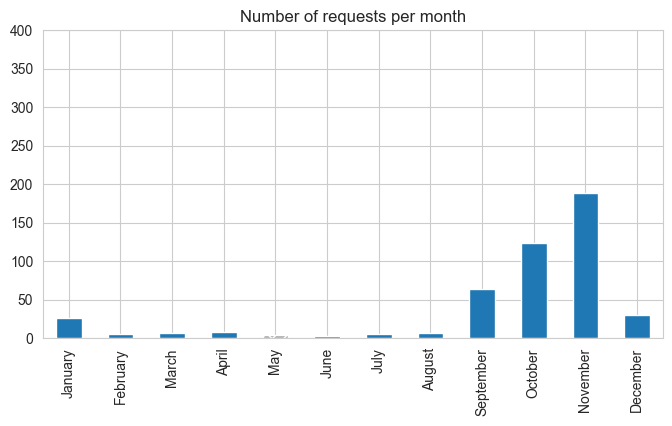

In [6]:
# full year averages since the last large import, up until the date of this database 
counts_since_import = pd.DataFrame(requests[requests.created_at.dt.date > pd.Timestamp("2023-07-23").date()].created_at.dt.month.value_counts().sort_index()) 
counts_since_import.index = [calendar.month_name[m + 1] for m in range(12)]

print('\nfull year totals since last large import\n')
display(counts_since_import)
show_monthly_hist(requests[requests.created_at.dt.date > pd.Timestamp("2023-07-23").date()])